# Volcano plots from DESeq2
Using ggplot to create grid of volcano plots generated from [DESeq_geneFeatureCounts.ipynb](https://github.com/jgmcdonough/CE18_methylRAD_analysis/blob/master/analysis/DMGs_analysis/DESeq_geneFeatureCounts.ipynb)

### 0. load libraries

In [1]:
library(tidyverse)
library(ggrepel) # to add gene names to plots

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 1. load df of combined DESeq results
results between each pairwise comparison can be found [here](https://github.com/jgmcdonough/CE18_methylRAD_analysis/tree/master/analysis/deseq_res_files/pairwise_results) 

files within that directory were combined into one file to create volcano grid, which is being loaded below (combined_geneRes.csv)

In [3]:
mega_df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/combined_geneRes.csv')
mega_df <- mega_df[-1]
head(mega_df)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pair,methyl,phase1_moreMe,phase2_moreMe
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,LOC111109452,18.77505,-0.16226559,0.3575755,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
2,LOC111124802,217.68988,0.09050737,0.1234114,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
3,LOC111101273,79.70594,-0.11280505,0.1483744,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
4,LOC111101250,127.13666,-0.13336153,0.1830605,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
5,LOC111101262,278.66598,0.19233094,0.1201891,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
6,LOC111133260,47.32761,-0.90652990,0.1964406,-3.342129,0.0008313848,0.1602441,CC_HC,not significant,not signficiant,not significant


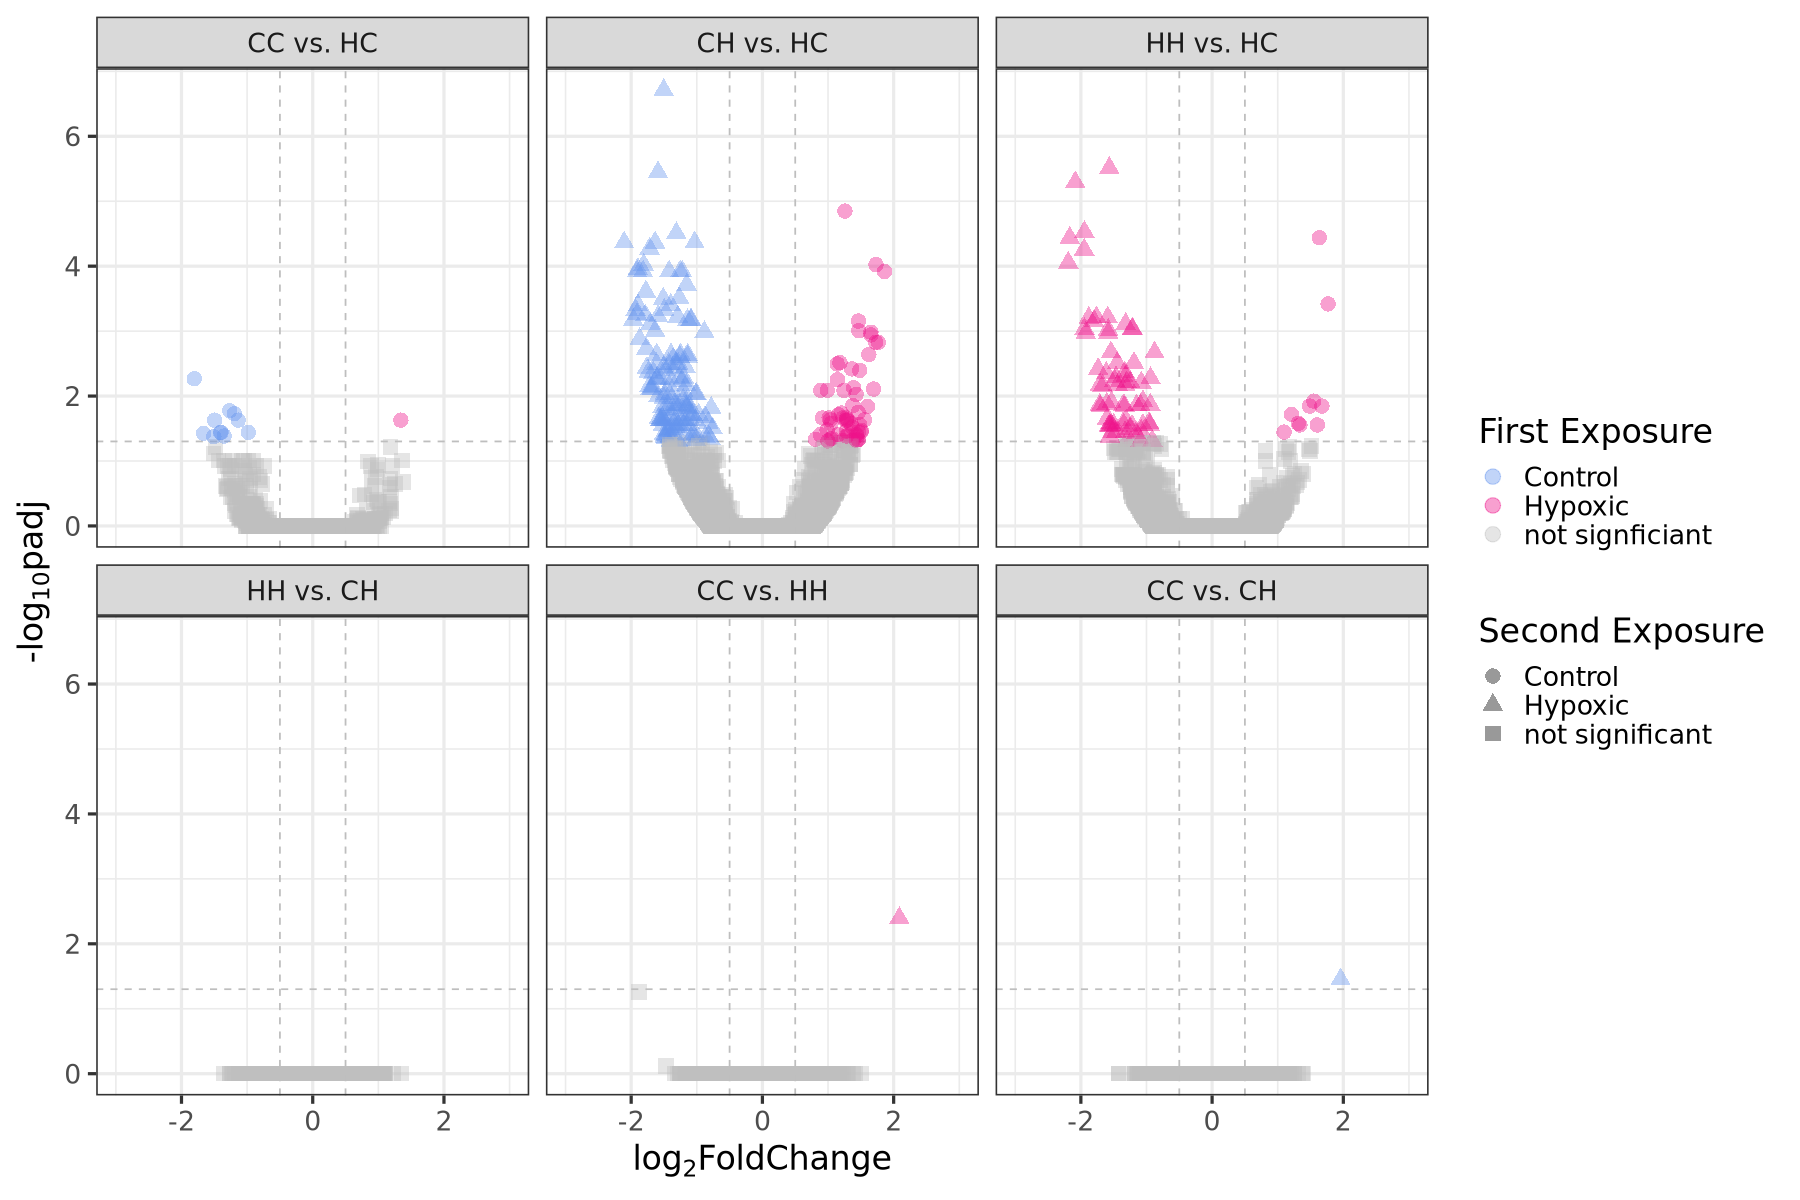

In [4]:
options(repr.plot.width=15, repr.plot.height=10)

# setting order of grids for facet_wrap
mega_df$pair <- factor(mega_df$pair, levels = c('CC_HC','CH_HC','HH_HC', 'HH_CH','HH_CC','CC_CH'))

# renaming grid labels
new_labels <- c(CC_HC = "CC vs. HC", 
                CH_HC = "CH vs. HC", 
                HH_HC = "HH vs. HC",
               HH_CH = "HH vs. CH",
               HH_CC = "CC vs. HH",
               CC_CH = "CC vs. CH")

volcano_MEGA <- ggplot(data = mega_df, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = phase1_moreMe,
                                          shape = phase2_moreMe)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
scale_color_manual(values=c('cornflowerblue','deeppink2', 'gray')) +
theme_bw(base_size=20) +
guides(col = guide_legend(order = 1),
          shape = guide_legend(order = 2)) +
facet_wrap(~pair, labeller = as_labeller(new_labels)) +
                        labs(col='First Exposure', 
                             shape = 'Second Exposure',
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano_MEGA

In [13]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/metaVolcano1.pdf', volcano_MEGA,
      width = 15, heigh = 10)

trying to add gene names to highlight in the plot

following pipeline [here](https://erikaduan.github.io/posts/2021-01-02-volcano-plots-with-ggplot2/)

In [4]:
head(mega_df)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pair,methyl,phase1_moreMe,phase2_moreMe
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,LOC111109452,18.77505,-0.16226559,0.3575755,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
2,LOC111124802,217.68988,0.09050737,0.1234114,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
3,LOC111101273,79.70594,-0.11280505,0.1483744,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
4,LOC111101250,127.13666,-0.13336153,0.1830605,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
5,LOC111101262,278.66598,0.19233094,0.1201891,0.000000,1.0000000000,1.0000000,CC_HC,not significant,not signficiant,not significant
6,LOC111133260,47.32761,-0.90652990,0.1964406,-3.342129,0.0008313848,0.1602441,CC_HC,not significant,not signficiant,not significant


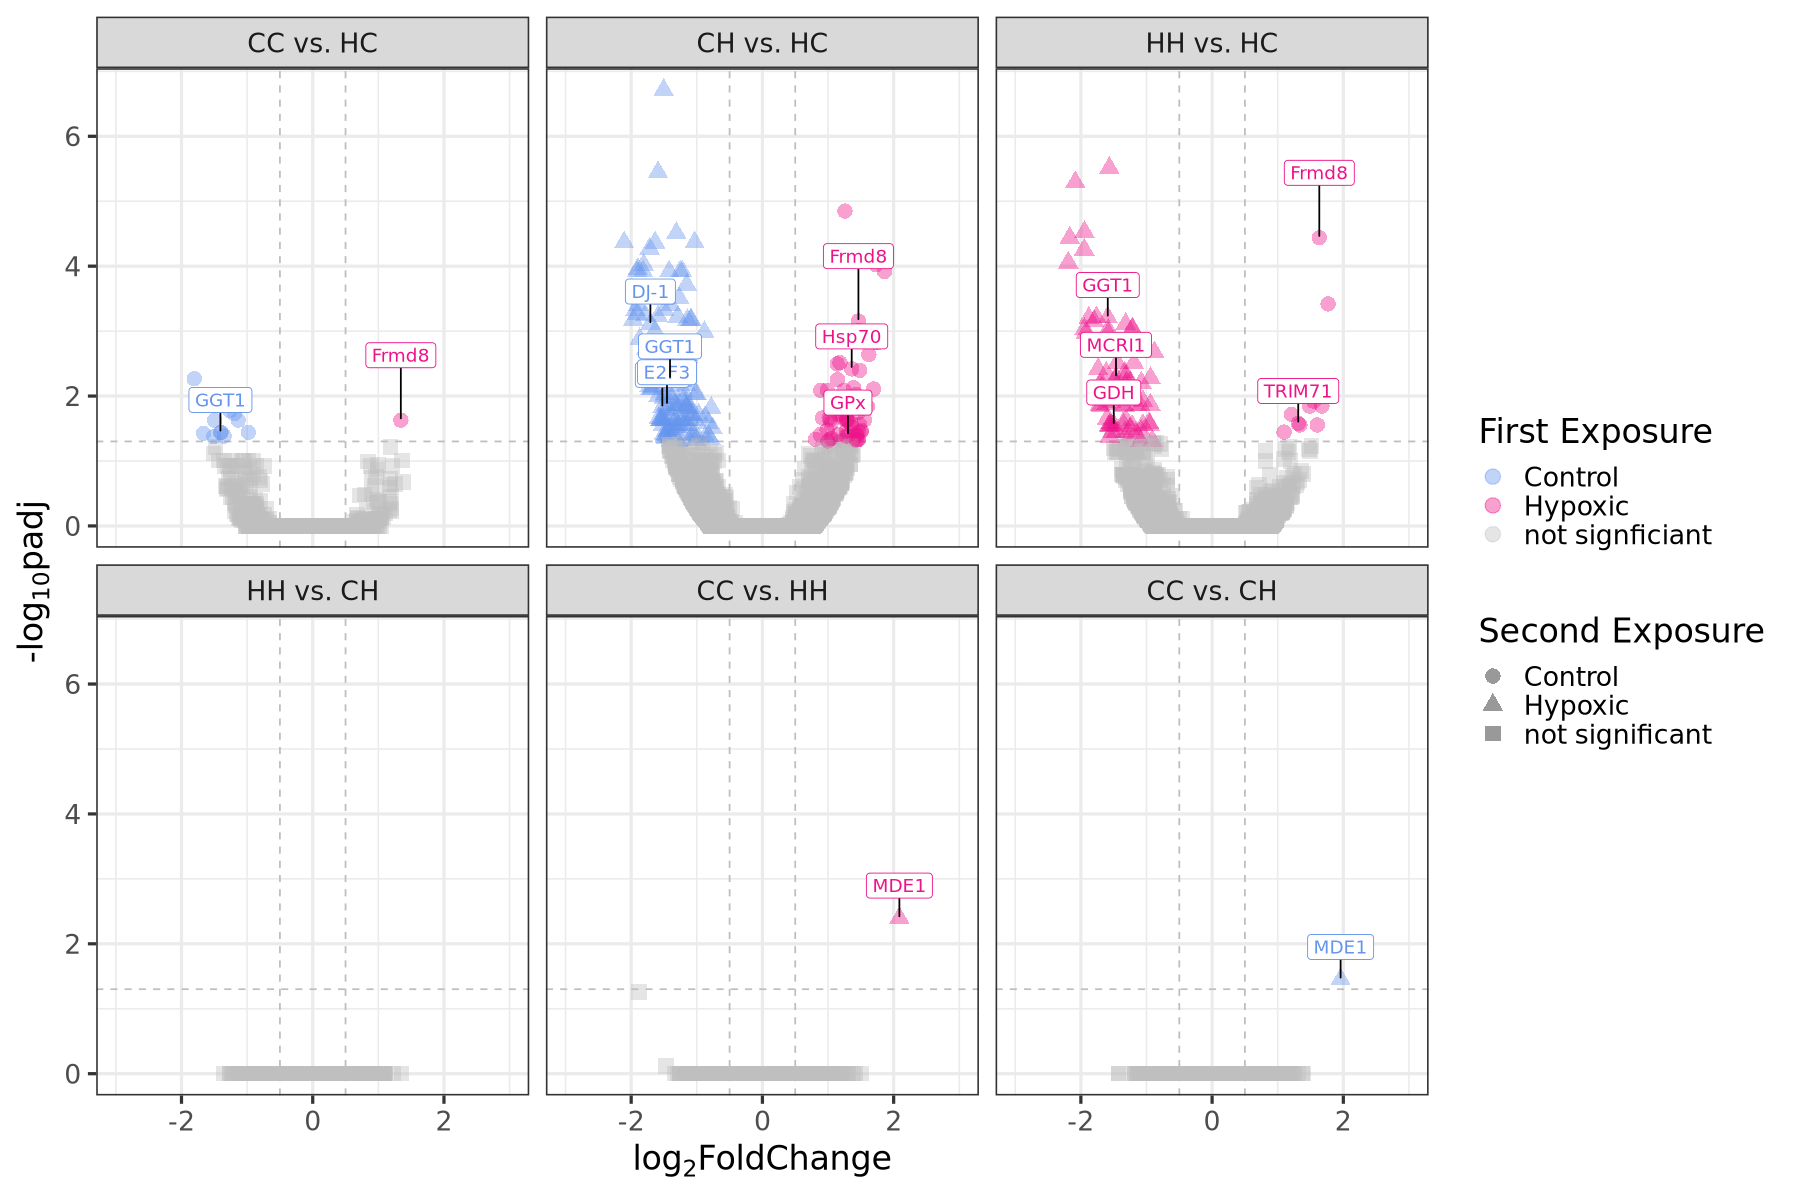

In [8]:
options(repr.plot.width=15, repr.plot.height=10)

# setting order of grids for facet_wrap
mega_df$pair <- factor(mega_df$pair, levels = c('CC_HC','CH_HC','HH_HC', 'HH_CH','HH_CC','CC_CH'))

# renaming grid labels
new_labels <- c(CC_HC = "CC vs. HC", 
                CH_HC = "CH vs. HC", 
                HH_HC = "HH vs. HC",
               HH_CH = "HH vs. CH",
               HH_CC = "CC vs. HH",
               CC_CH = "CC vs. CH")

###### choosing noteworthy genes ######
shared_bottom <- mega_df %>%
filter(X == 'LOC111100699',pair %in% c('CC_CH', 'HH_CC'))

# GPx
gpx <- mega_df %>%
filter(X == 'LOC111120666', pair %in% 'CH_HC')

# GGT1
ggt1 <- mega_df %>%
filter(X == 'LOC111124674', pair %in% c('CH_HC', 'CC_HC', 'HH_HC'))

# HSP70
hsp70 <- mega_df %>%
filter(X == 'LOC111137579', pair %in% 'CH_HC')

# FERMD8
ferm <- mega_df %>%
filter(X == 'LOC111129146', pair %in% c('CH_HC', 'CC_HC', 'HH_HC'))

# MCRI1
mapk <- mega_df %>%
filter(X == 'LOC111121129', pair %in% 'HH_HC')

# TRIM71
trim71 <- mega_df %>%
filter(X == 'LOC111110897', pair %in% 'HH_HC')

# GDH
gdh <- mega_df %>%
filter(X == 'LOC111119107', pair %in% c('CH_HC', 'HH_HC'))

# E2F3
e2f3 <- mega_df %>%
filter(X == 'LOC111119994', pair %in% 'CH_HC')

# dj-1
dj1 <- mega_df %>%
filter(X == 'LOC111101925', pair %in% 'CH_HC')


###### Creating volcano plot of all data ######

volcano_MEGA <- ggplot(data = mega_df, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = phase1_moreMe,
                                          shape = phase2_moreMe)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +

# pointing out noteworthy genes in the plots
geom_label_repel(data = shared_bottom,
                 aes(label = 'MDE1'),
                 force = 2,
                 nudge_y = 0.5,
                 segment.color = "black",  
                show.legend = FALSE) +
geom_label_repel(data = gdh,
                 aes(label = 'GDH'),
                 force = 2,
                 nudge_y = 0.5,
                 segment.color = "black",  
                show.legend = FALSE) +
geom_label_repel(data = dj1,
                 aes(label = 'DJ-1'),
                 force = 2,
                 nudge_y = 0.5,
                 segment.color = "black",  
                show.legend = FALSE) +
geom_label_repel(data = e2f3,
                 aes(label = 'E2F3'),
                 force = 2,
                 nudge_y = 0.5,
                 segment.color = "black",  
                show.legend = FALSE) +
geom_label_repel(data = trim71,
                 aes(label = 'TRIM71'),
                 force = 2,
                 nudge_y = 0.5,
                 segment.color = "black",  
                show.legend = FALSE) +
geom_label_repel(data = gpx,
                 aes(label = 'GPx'),
                 force = 4,
                 nudge_y = 0.5,
                 segment.color = "black",  
                show.legend = FALSE) + 
geom_label_repel(data = ggt1,
                 aes(label = 'GGT1'),
                 force = 2,
                 nudge_y = 0.5,
                 segment.color = "black",  
                show.legend = FALSE) + 
geom_label_repel(data = hsp70,
                 aes(label = 'Hsp70'),
                 force = 4,
                 nudge_y = .5,
                 segment.color = "black",  
                show.legend = FALSE) + 
geom_label_repel(data = ferm,
                 aes(label = 'Frmd8'),
                 force = 4,
                 nudge_y = 1,
                 segment.color = "black",  
                show.legend = FALSE) + 
geom_label_repel(data = mapk,
                 aes(label = 'MCRI1'),
                 force = 4,
                 nudge_y = 0.5,
                 segment.color = "black",  
                show.legend = FALSE) + 

# colors of first exposure points
scale_color_manual(values=c('cornflowerblue','deeppink2', 'gray')) +
theme_bw(base_size=20) +

# specifying order of key
guides(col = guide_legend(order = 1),
          shape = guide_legend(order = 2)) +

# creating faceted grids with labels for the pairwise comparison
facet_wrap(~pair, labeller = as_labeller(new_labels)) +
                        labs(col='First Exposure', 
                             shape = 'Second Exposure',
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano_MEGA

I picked FRMD8 just because it was the only hypermethylated gene for HC in the CC vs. HC comparison - looks like it's involved in endocytosis - maybe don't want to include this? not sure...

In [44]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/metaVolc_withGenes.pdf', volcano_MEGA,
      width = 15, heigh = 10)

just adding another option for how things are labelled

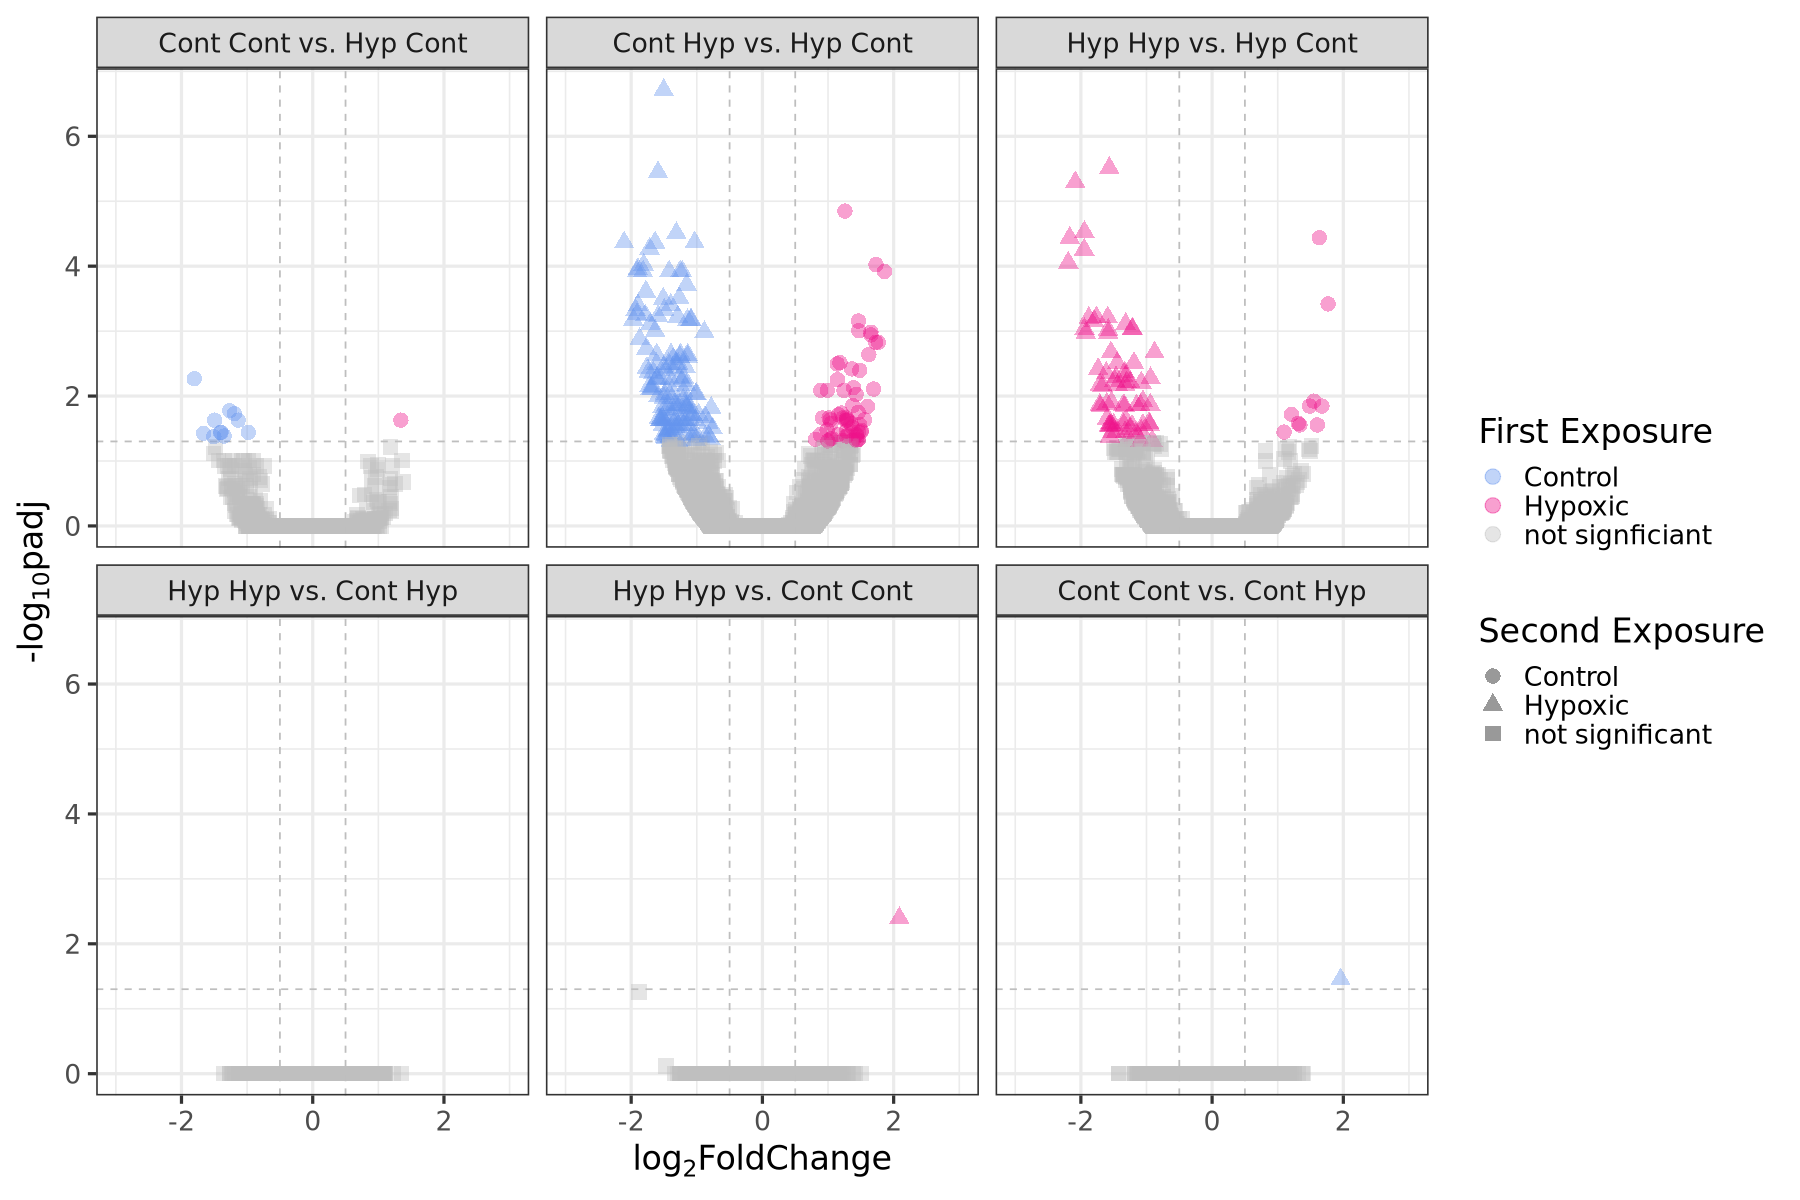

In [10]:
options(repr.plot.width=15, repr.plot.height=10)

# setting order of grids for facet_wrap
mega_df$pair <- factor(mega_df$pair, levels = c('CC_HC','CH_HC','HH_HC', 'HH_CH','HH_CC','CC_CH'))

# renaming grid labels
new_labels <- c(CC_HC = "Cont Cont vs. Hyp Cont", 
                CH_HC = "Cont Hyp vs. Hyp Cont", 
                HH_HC = "Hyp Hyp vs. Hyp Cont",
               HH_CH = "Hyp Hyp vs. Cont Hyp",
               HH_CC = "Hyp Hyp vs. Cont Cont",
               CC_CH = "Cont Cont vs. Cont Hyp")

volcano_MEGA2 <- ggplot(data = mega_df, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = phase1_moreMe,
                                          shape = phase2_moreMe)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
scale_color_manual(values=c('cornflowerblue','deeppink2', 'gray')) +
theme_bw() +
guides(col = guide_legend(order = 1),
          shape = guide_legend(order = 2)) +
facet_wrap(~pair, labeller = as_labeller(new_labels)) + 
                        theme_bw(base_size=20) + 
                        labs(col='First Exposure', 
                             shape = 'Second Exposure',
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano_MEGA2

### 2. individual volcano plots
old code from before I put all of these into a grid...

In [16]:
# to change size of plots
options(repr.plot.width=10, repr.plot.height=5)

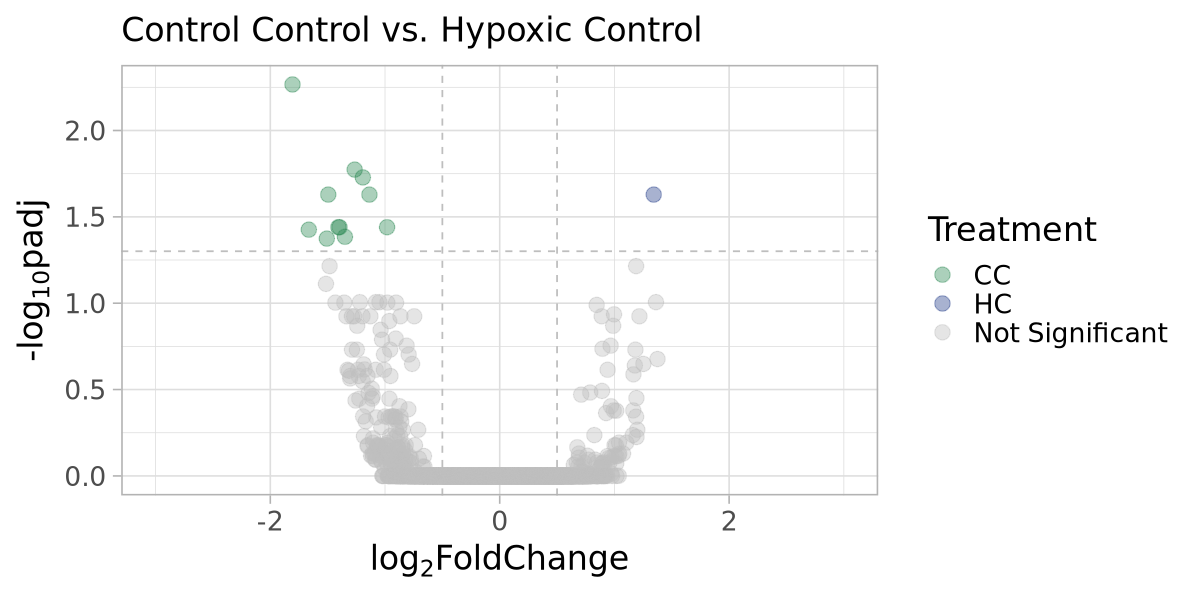

In [17]:
#1 control control vs. hypoxic control
CC_HC <- na.omit(CC_HC) # removing rows with NA for padj

volcano1 <- ggplot(data = CC_HC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('CC', 'HC', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                       labs(subtitle = 'Control Control vs. Hypoxic Control',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano1

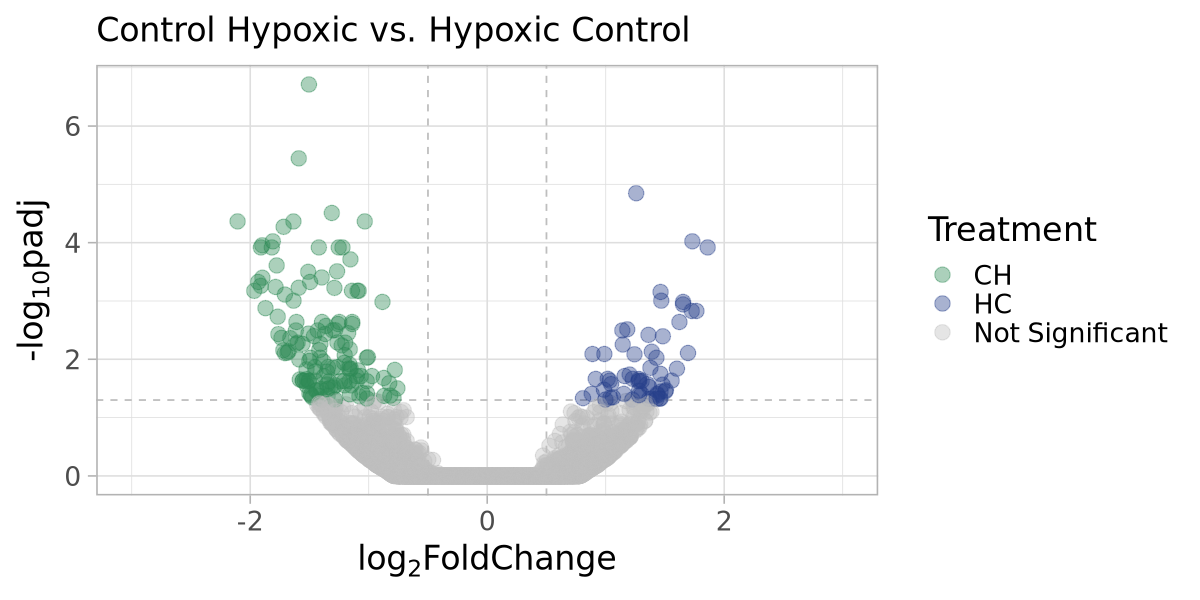

In [18]:
#2 control hypoxic vs. hypoxic control
CH_HC <- na.omit(CH_HC) # removing rows with NA for padj

volcano2 <- ggplot(data = CH_HC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('CH', 'HC', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Control Hypoxic vs. Hypoxic Control',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano2

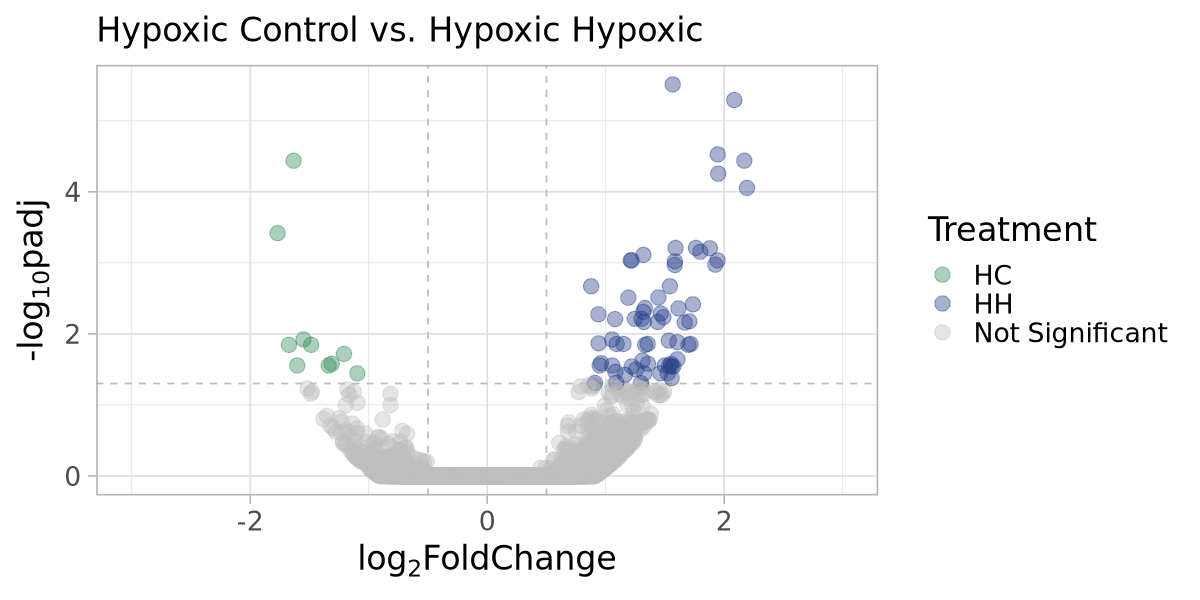

In [19]:
#3 hypoxic hypoxic vs. hypoxic control
HH_HC <- na.omit(HH_HC) # removing rows with NA for padj

volcano3 <- ggplot(data = HH_HC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('HC', 'HH', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Hypoxic Control vs. Hypoxic Hypoxic',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano3

want to actually flip the above plot so that HC is on the right and HH is on the left - to do this, make pos. LFC to neg and vice versa

In [20]:
# Switch the signs
HH_HC_flip <- HH_HC %>%
  mutate(log2FoldChange = -log2FoldChange)

HH_HC_flip$methyl <- ifelse(HH_HC_flip$log2FoldChange<0 & HH_HC_flip$padj < 0.05, "HH", 
                        ifelse(HH_HC_flip$log2FoldChange>0 & HH_HC_flip$padj < 0.05, "HC", 
                               "not significant"))

# View the modified dataframe
head(HH_HC_flip)
head(HH_HC)


,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pair,methyl
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
17,LOC111109452,18.77505,-0.15596788,0.3558042,0.000000,1.0000000000,1.00000000,HH_HC,not significant
18,LOC111124802,217.68988,0.07392689,0.1169430,0.000000,1.0000000000,1.00000000,HH_HC,not significant
19,LOC111101273,79.70594,0.11359457,0.1401031,0.000000,1.0000000000,1.00000000,HH_HC,not significant
20,LOC111101250,127.13666,0.01945303,0.1770973,0.000000,1.0000000000,1.00000000,HH_HC,not significant
21,LOC111101262,278.66598,0.08728262,0.1141343,0.000000,1.0000000000,1.00000000,HH_HC,not significant
22,LOC111133260,47.32761,-0.96099812,0.1844565,3.854558,0.0001159391,0.02584583,HH_HC,HH


,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pair,methyl
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
17,LOC111109452,18.77505,0.15596788,0.3558042,0.000000,1.0000000000,1.00000000,HH_HC,not significant
18,LOC111124802,217.68988,-0.07392689,0.1169430,0.000000,1.0000000000,1.00000000,HH_HC,not significant
19,LOC111101273,79.70594,-0.11359457,0.1401031,0.000000,1.0000000000,1.00000000,HH_HC,not significant
20,LOC111101250,127.13666,-0.01945303,0.1770973,0.000000,1.0000000000,1.00000000,HH_HC,not significant
21,LOC111101262,278.66598,-0.08728262,0.1141343,0.000000,1.0000000000,1.00000000,HH_HC,not significant
22,LOC111133260,47.32761,0.96099812,0.1844565,3.854558,0.0001159391,0.02584583,HH_HC,HH


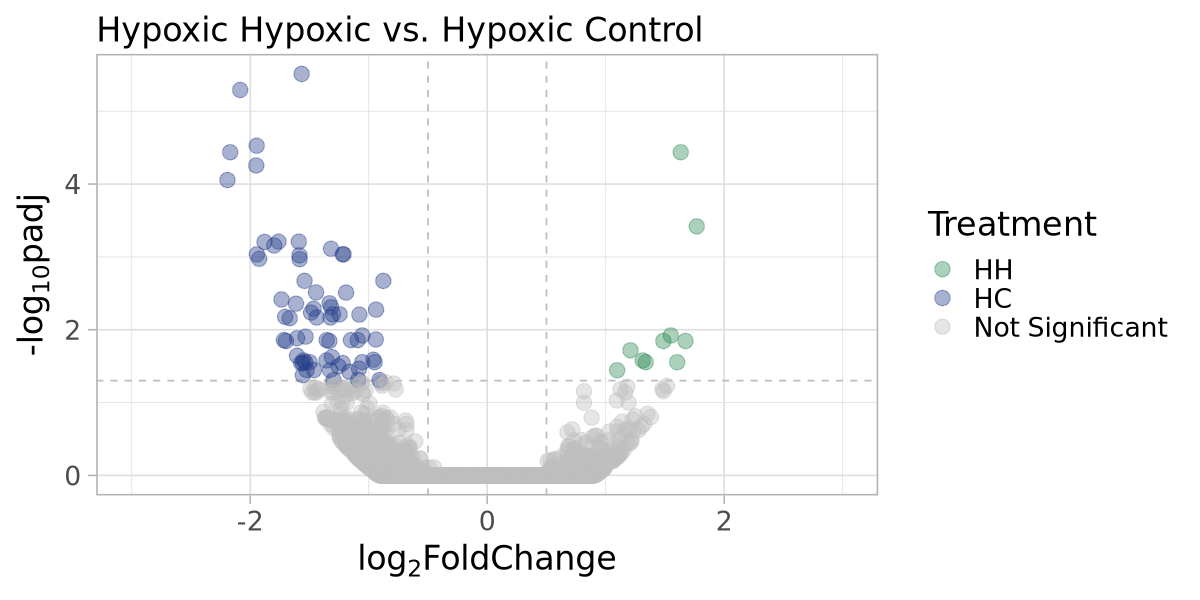

In [21]:
#3 hypoxic hypoxic vs. hypoxic control FLIPPED
volcano3.5 <- ggplot(data = HH_HC_flip, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('HH', 'HC', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Hypoxic Hypoxic vs. Hypoxic Control',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano3.5

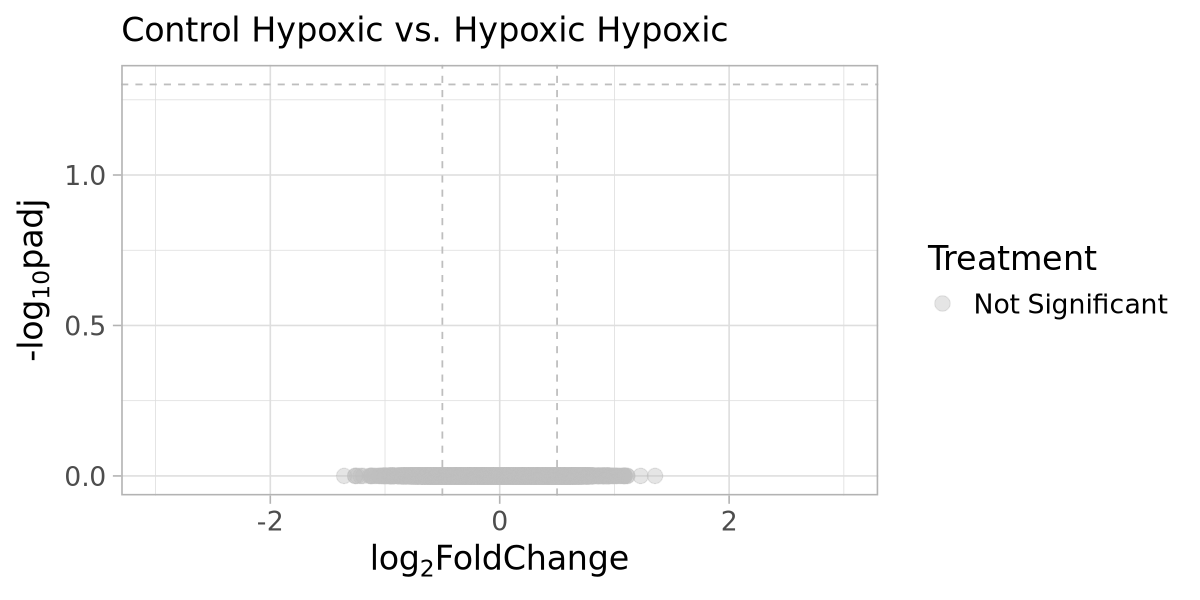

In [22]:
#4 hypoxic hypoxic vs. control hypoxic
HH_CH <- na.omit(HH_CH) # removing rows with NA for padj

volcano4 <- ggplot(data = HH_CH, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('gray'),
                                           labels=c('Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Control Hypoxic vs. Hypoxic Hypoxic',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano4

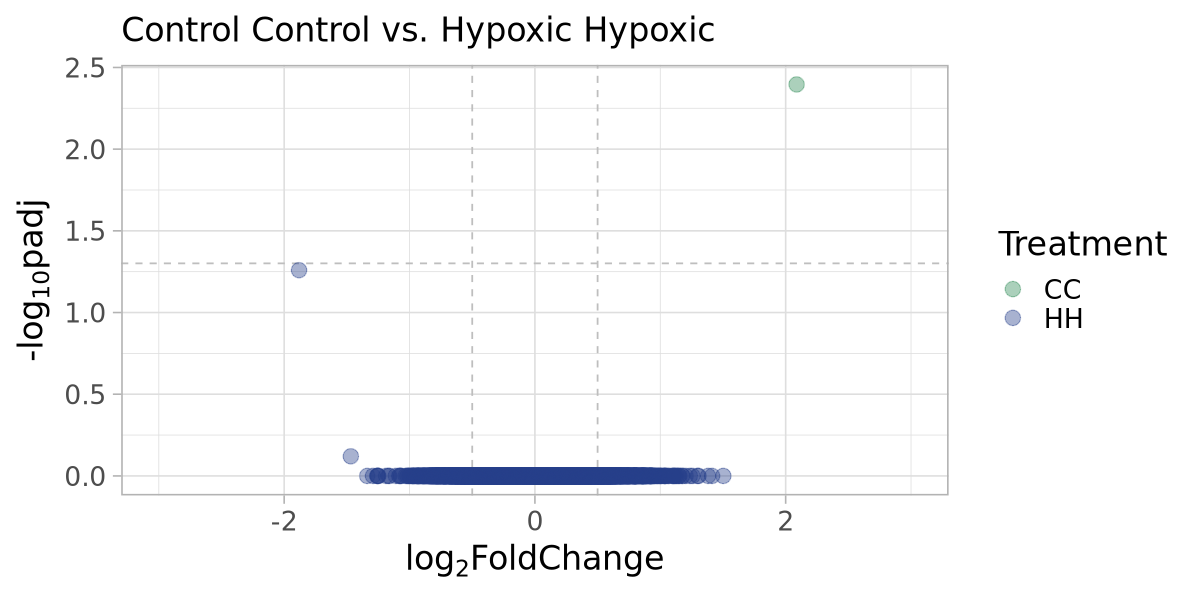

In [23]:
#5 hypoxic hypoxic vs. control control
HH_CC <- na.omit(HH_CC) # removing rows with NA for padj

volcano5 <- ggplot(data = HH_CC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('CC', 'HH', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Control Control vs. Hypoxic Hypoxic',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano5

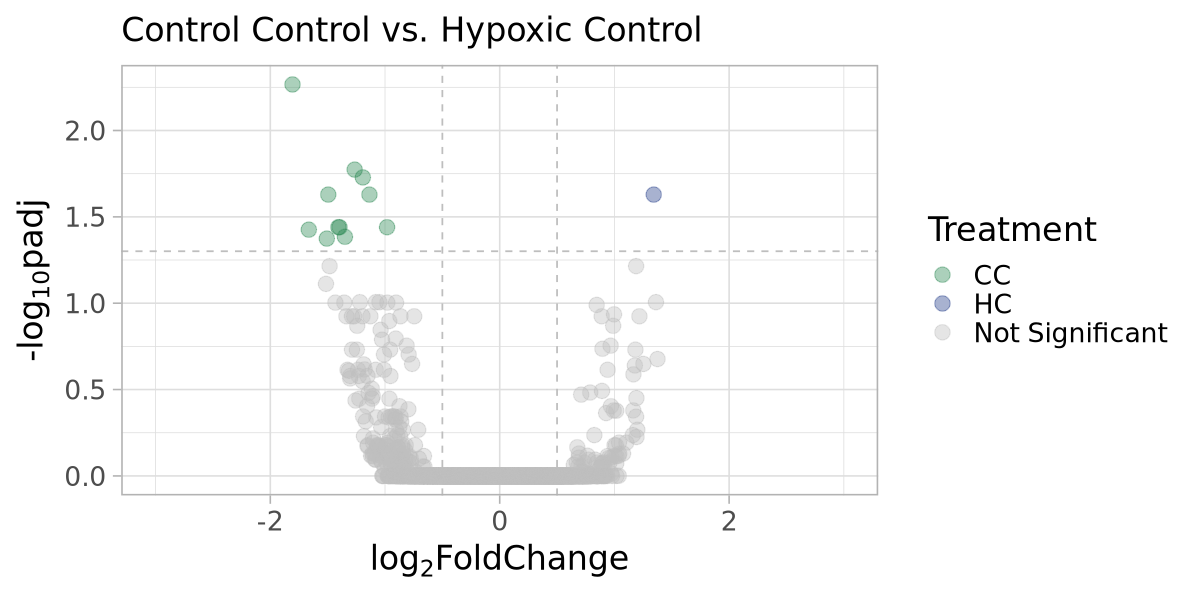

In [24]:
#6 control control vs. control hypoxic
CC_HC <- na.omit(CC_HC) # removing rows with NA for padj

volcano6 <- ggplot(data = CC_HC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('CC', 'HC', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Control Control vs. Hypoxic Control',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano6